# Persian Handwritten Digit Recognition With LeNet-5

Author: **Marcin Sikorski**<br>
Date: November, 2023

Performing a classification task on Persian handwritten digits. This collection features 150 000 images, with 15 000 images per class, spanning the entire range of Persian digits from 0 to 9. The images have a unified size 28 x 28, contain 1 channel, and are in JPG format. The digits (images) will be classified with LeNet-5, a very basic convolutional neural network originally applied in identifying handwritten zip code numbers in 1998.

Examples of handwritten digits:
<p align='center'>
<img src='https://www.researchgate.net/profile/Ezzat-El-Sherif/publication/220163401/figure/tbl1/AS:643928642555914@1530535960964/Persian-printed-and-handwritten-digits.png' width='400'/>
<p style='text-align: center;'>Image source: https://www.researchgate.net/publication/220163401_Arabic_handwritten_digit_recognition</p>
</p>

**Data source:** [Persian Handwritten Digits](https://www.kaggle.com/datasets/amirmahdiabbootalebi/persian-handwritten-digits)

**Notebook Content:**
1. Set Up Environment & Read Dataset
2. Generate Training and Testing Data
3. Data Preprocessing
4. Define & Train LeNet-5 Model
5. Evaluate Performance
6. Conclusion

### 1. Set Up Environment & Read Dataset

We will start from downloading the dataset and importing the modules. Next, we will check the image distribution in each dataset (train and test). Finally, we will plot a random sample for each digit.

In [1]:
#pip install opendatasets
import opendatasets as od

try:
    od.download('https://www.kaggle.com/datasets/amirmahdiabbootalebi/persian-handwritten-digits', force=False)
    print('Dataset downloaded')
except ImportError:
    print('Download failed')

100%|████████████████████████████████████████████████████████████████████████████████| 117M/117M [02:44<00:00, 744kB/s]



Dataset downloaded


In [2]:
import os
from random import choice
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
train_dir = 'C:/Users/.../persian_numbers/persian-handwritten-digits/Train/'
test_dir = 'C:/Users/.../persian_numbers/persian-handwritten-digits/Test/'

def dataset_distribution():
    filelist = os.listdir(train_dir)
    
    print('Image distribution in train dataset:')
    for i in filelist:
        print(f'{i}: {len(os.listdir(train_dir + str(i)))} images')
        
    filelist = os.listdir(test_dir)
    
    print('\nImage distribution in test dataset:')
    for i in filelist:
        print(f'{i}: {len(os.listdir(test_dir + str(i)))} images')
        
dataset_distribution()

Image distribution in train dataset:
class_0: 10000 images
class_1: 10000 images
class_2: 10000 images
class_3: 10000 images
class_4: 10000 images
class_5: 10000 images
class_6: 10000 images
class_7: 10000 images
class_8: 10000 images
class_9: 10000 images

Image distribution in test dataset:
class_0: 5000 images
class_1: 5000 images
class_2: 5000 images
class_3: 5000 images
class_4: 5000 images
class_5: 5000 images
class_6: 5000 images
class_7: 5000 images
class_8: 5000 images
class_9: 5000 images


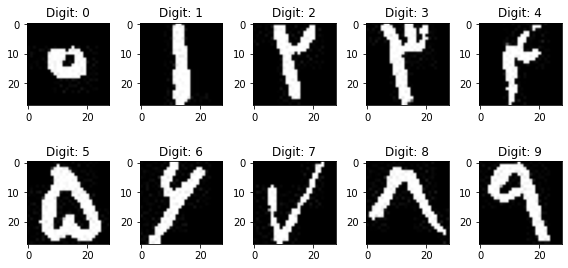

In [4]:
def display_images():
    fig, axs = plt.subplots(2, 5, figsize=(8, 4), tight_layout=True)
    for i in range(10):
        class_dir = os.listdir(train_dir + '/class_' + str(i))
        image_filename = choice(class_dir)
        image_path = train_dir + '/class_' + str(i) + '/' + image_filename
        #image = imread(image_path)
        image = Image.open(image_path)
        img = axs[int(i >= 5), i % 5].imshow(image, cmap='gray')
        img.axes.axis('on')
        img.axes.set_title(f'Digit: {i}')
    plt.show()

display_images()

### 2. Generate Training and Testing Data

To prepare our data for further deep learning we will implement the following steps for each subset:
* retrieve and list paths to all images,
* convert images into separate NumPy arrays and stack them into one array,
* generate image labels and stack them into one long vector (one-dimensional array),
* shuffle the elements in arrays so that corresponding images continue to correspond with their true labels.

In [5]:
def get_paths(dataset):
    if dataset == 'train':
        filelist = os.listdir(train_dir)
        
        # lists paths in 'train_dir'
        paths = []
        for x in filelist:
            if x.startswith('class_'):
                paths.append(train_dir + x + '/')
                
        all_images = []
        
        # lists JPG files in all directories
        for i in paths:
            filelist_2 = os.listdir(i)
            for j in filelist_2:
                if j.endswith('.jpg'):
                    all_images.append(i + j)
                    
    if dataset == 'test':
        filelist = os.listdir(test_dir)
        
        # lists paths in 'test_dir'
        path = []
        for x in filelist:
            if x.startswith('class_'):
                path.append(test_dir + x + '/')
                
        all_images = []
        
        # lists JPG files in all directories
        for i in path:
            filelist_2 = os.listdir(i)
            for j in filelist_2:
                if j.endswith('.jpg'):
                    all_images.append(i + j)
                    
    return all_images
                    
train_paths = get_paths(dataset='train')
test_paths = get_paths(dataset='test')

In [6]:
def generate_train_data():
    # prepare train images
    train_images = []

    for i in train_paths:
        image = Image.open(i)
        train_images.append(np.asarray(image))
    
    # generate train labels
    train_labels = []
    
    for i in range(10):
        train_labels.append([i] * 10_000)
    
    flat_list = []
    for row in train_labels:
        flat_list.extend(row)
        
    return np.array(train_images), np.array(flat_list)

X_train, y_train = generate_train_data()

print('Training images:', len(X_train))
print('Training labels:', len(y_train))

Training images: 100000
Training labels: 100000


In [7]:
def generate_test_data():
    # prepare test images
    test_images = []

    for i in test_paths:
        image = Image.open(i)
        test_images.append(np.asarray(image))
    
    # generate test labels
    test_labels = []
    
    for i in range(10):
        test_labels.append([i] * 5_000)
    
    flat_list = []
    for row in test_labels:
        flat_list.extend(row)
        
    return np.array(test_images), np.array(flat_list)

X_test, y_test = generate_test_data()

print('Testing images:', len(X_test))
print('Testing labels:', len(y_test))

Testing images: 50000
Testing labels: 50000


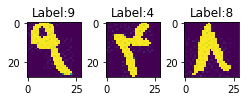

In [8]:
# shuffle train & test subsets
def unison_array_shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_train, y_train = unison_array_shuffle(X_train, y_train)
X_test, y_test = unison_array_shuffle(X_test, y_test)

# optional shuffling with sklearn
#from sklearn.utils import shuffle
#X_train, y_train = shuffle(X_train, y_train, random_state=0)
#X_test, y_test = shuffle(X_test, y_test, random_state=0)

plt.figure(figsize=(4, 1))

plt.subplot(1, 3, 1)
plt.imshow(X_train[1200], interpolation='nearest')
plt.title('Label:' + str(y_train[1200]))

plt.subplot(1, 3, 2)
plt.imshow(X_test[1300], interpolation='nearest')
plt.title('Label:' + str(y_test[1300]))

plt.subplot(1, 3, 3)
plt.imshow(X_test[10], interpolation='nearest')
plt.title('Label:' + str(y_test[10]))
plt.show()

### 3. Data Preprocessing

In this step we will partion our dataset into training and validation sets with a 80:20 ratio. At this part we will increase array dimensions for images - add new axes that represents image channel. Finally, normalization will be performed, so that values will be set in range [0, 1].

In [9]:
# split data
X_val, y_val = X_train[80_000:, ..., np.newaxis], y_train[80_000:]
X_train, y_train = X_train[:80_000, ..., np.newaxis], y_train[:80_000]
X_test = X_test[..., np.newaxis]

In [10]:
# normalize data
X_train, X_val, X_test = X_train/255.0, X_val/255.0, X_test/255.0
X_train -= np.mean(X_train)
X_val -= np.mean(X_val)
X_test -= np.mean(X_test)

print('Final image shape:', X_train[0].shape, end='\n\n')
print('Training samples:', len(X_train))
print('Validation samples:', len(X_val))
print('Testing samples:', len(X_test))

Final image shape: (28, 28, 1)

Training samples: 80000
Validation samples: 20000
Testing samples: 50000


### 4. Define & Train LeNet-5 Model

LeNet is one of the very first convolutional neural networks primary applied in identifying handwritten numbers. LeNet-5 has these assumptions and architecture:
* two convolutional layers,
* three fully connected layers,
* two average pooling layers,
* hidden layers contain tanh as activation function,
* output layer contains softmax as activation function,
* cross-entropy as cost function,
* stochastic gradient descent as optimizer,
* converge after 10–12 epochs,
* have a minimum error rate of 0.95 on test set (monitoring accuracy as metric in learning process).

Keras Applications do not have a LeNet-5 model, so we will construct it from scratch - [example](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/1920px-Comparison_image_neural_networks.svg.png).

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# define and build the model's architecture
def lenet5_architecture():
    model = Sequential(
        [
            Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='valid'),
            
            AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
            
            Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
            
            AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
            
            Flatten(),
            
            Dense(units=120, activation='tanh'),
            
            Dense(units=84, activation='tanh'),
            
            Dense(units=10, activation='softmax')
        ], name='LeNet-5'
    )
    
    # define optimizer & compile the model
    sgd_opt = SGD(learning_rate=0.01, momentum=0.0, decay=0.0)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_opt, metrics=['accuracy'])
    
    return model

LeNet5_model = lenet5_architecture()

# display the network's summary
LeNet5_model.summary()

# display optimizer params
#LeNet5_model.optimizer.get_config()

Model: "LeNet-5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3084

In [12]:
# train CNN
history = LeNet5_model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
2500/2500 [==============================] - 17s 7ms/step - loss: 0.2595 - accuracy: 0.9351 - val_loss: 0.0840 - val_accuracy: 0.9798
Epoch 2/20
2500/2500 [==============================] - 16s 6ms/step - loss: 0.0641 - accuracy: 0.9831 - val_loss: 0.0503 - val_accuracy: 0.9865
Epoch 3/20
2500/2500 [==============================] - 16s 6ms/step - loss: 0.0430 - accuracy: 0.9887 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 4/20
2500/2500 [==============================] - 16s 7ms/step - loss: 0.0334 - accuracy: 0.9910 - val_loss: 0.0308 - val_accuracy: 0.9911
Epoch 5/20
2500/2500 [==============================] - 16s 6ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.0271 - val_accuracy: 0.9923
Epoch 6/20
2500/2500 [==============================] - 16s 7ms/step - loss: 0.0237 - accuracy: 0.9938 - val_loss: 0.0241 - val_accuracy: 0.9934
Epoch 7/20
2500/2500 [==============================] - 16s 7ms/step - loss: 0.0209 - accuracy: 0.9944 - val_loss: 0.0216 - val_ac

### 5. Evaluate Performance

Now, it's time to test our model and make predictions.

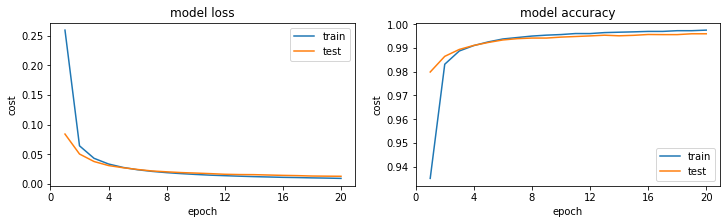

In [13]:
def diagnosis_plots():
    metric_list =  ['loss', 'accuracy']
    epochs = len(history.history['loss']) + 1
    
    plt.figure(figsize=(12, 3))
    
    for i, metric in enumerate(metric_list):   
        plt.subplot(1, 2, i + 1)
        plt.plot(range(1, epochs), history.history[metric], label='train')
        plt.plot(range(1, epochs), history.history['val_' + metric], label='test')
        plt.title('model ' + metric)
        plt.legend(loc='best')
        plt.xticks(range(0, epochs, 4))
        plt.xlabel('epoch')
        plt.ylabel('cost')
    plt.show()
    
diagnosis_plots()

              precision  recall  f1-score     support
0              0.999800  0.9996  0.999700   5000.0000
1              0.998002  0.9988  0.998401   5000.0000
2              0.991386  0.9898  0.990592   5000.0000
3              0.992578  0.9896  0.991087   5000.0000
4              0.994422  0.9984  0.996407   5000.0000
5              0.999198  0.9972  0.998198   5000.0000
6              0.998595  0.9952  0.996895   5000.0000
7              0.998402  0.9996  0.999001   5000.0000
8              0.997004  0.9982  0.997601   5000.0000
9              0.994616  0.9976  0.996106   5000.0000
accuracy       0.996400  0.9964  0.996400      0.9964
macro avg      0.996400  0.9964  0.996399  50000.0000
weighted avg   0.996400  0.9964  0.996399  50000.0000


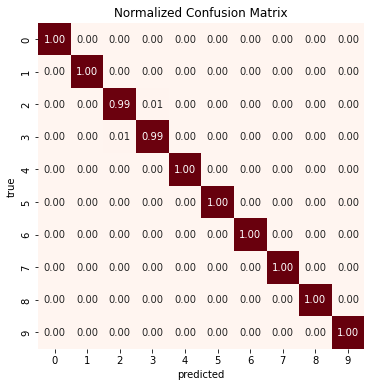

In [14]:
from pandas import DataFrame
from sklearn.metrics import classification_report, confusion_matrix
from seaborn import heatmap

def classification_reports():
    # make predictions and retrieve their indexes
    predictions = LeNet5_model.predict(X_test)
    y_pred = np.argmax(predictions, axis=1)
    
    # print classification report
    print(DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose())
    
    # plot confusion matrix
    plt.figure(figsize=(6, 6))
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    heatmap(cm, annot=True, cmap='Reds', fmt='.2f', square=True, cbar=False)
    plt.xlabel('predicted')
    plt.ylabel('true')
    plt.title('Normalized Confusion Matrix')
    plt.show()
    
classification_reports()

Persian twos and threes were the hardest to predict. Indeed, they look very similar. Other digits were predicted almost perfectly.

### 6. Conclusion

The task of this notebook was to perform a classification problem (image recognition) on Persian handwritten digits. We created a CNN from scratch and implemented the LeNet-5 architecture. The model evaluation proved LeNet-5 to be very effective on this dataset and is still a great choice despite its simplicity and age.

**References:**

* Gradient Based Learning Applied to Document Recognition (1998), [Full Text](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)
* https://en.wikipedia.org/wiki/LeNet [Accessed: 29.11.2023]
* https://hackmd.io/@machine-learning/S1WvJyqmI [Accessed: 29.11.2023]
* https://medium.com/@siddheshb008/lenet-5-architecture-explained-3b559cb2d52b [Accessed: 29.11.2023]